# <center>Run, analyze, and write up your experiment results</center>

 

### Import packages

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

### Load and visualize the dataset

In [2]:
undergrad_data=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Capstone 1/nces330_20.csv")

In [3]:
undergrad_data.info()
undergrad_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473
5,2013,Alabama,Public Out-of-State,2-year,Fees/Tuition,7736
6,2013,Alabama,Public Out-of-State,4-year,Fees/Tuition,20380
7,2013,Alabama,Public Out-of-State,4-year,Room/Board,8473
8,2013,Alaska,Private,4-year,Fees/Tuition,21496
9,2013,Alaska,Private,4-year,Room/Board,8923


### Data set that only includes records with "Fees/Tuition"

In [4]:
data=undergrad_data[undergrad_data["Expense"]=='Fees/Tuition']

#### How many entries for each type of universities?

In [5]:
data.groupby('Type').agg(['count'])

,Year,State,Length,Expense,Value
,count,count,count,count,count
Type,,,,,
Private,455,455,455,455,455
Public In-State,846,846,846,846,846
Public Out-of-State,897,897,897,897,897


### In-state and Out-of-state data frames

In [6]:
In_state_data= data[data['Type']=='Public In-State']
Out_of_state_data= data[data['Type']=='Public Out-of-State']

In [7]:
In_state_data.info()
In_state_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 2 to 3543
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     846 non-null    int64 
 1   State    846 non-null    object
 2   Type     846 non-null    object
 3   Length   846 non-null    object
 4   Expense  846 non-null    object
 5   Value    846 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 46.3+ KB


,Year,State,Type,Length,Expense,Value
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
10,2013,Alaska,Public In-State,2-year,Fees/Tuition,3972
11,2013,Alaska,Public In-State,4-year,Fees/Tuition,6317
18,2013,Arizona,Public In-State,2-year,Fees/Tuition,1842


In [8]:
Out_of_state_data.info()
Out_of_state_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 5 to 3546
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     897 non-null    int64 
 1   State    897 non-null    object
 2   Type     897 non-null    object
 3   Length   897 non-null    object
 4   Expense  897 non-null    object
 5   Value    897 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 49.1+ KB


,Year,State,Type,Length,Expense,Value
5,2013,Alabama,Public Out-of-State,2-year,Fees/Tuition,7736
6,2013,Alabama,Public Out-of-State,4-year,Fees/Tuition,20380
13,2013,Alaska,Public Out-of-State,2-year,Fees/Tuition,4150
14,2013,Alaska,Public Out-of-State,4-year,Fees/Tuition,18790
21,2013,Arizona,Public Out-of-State,2-year,Fees/Tuition,7870


#### The two dataframes pretty much have the same size, which is great to avoid biasness

### Check for normality

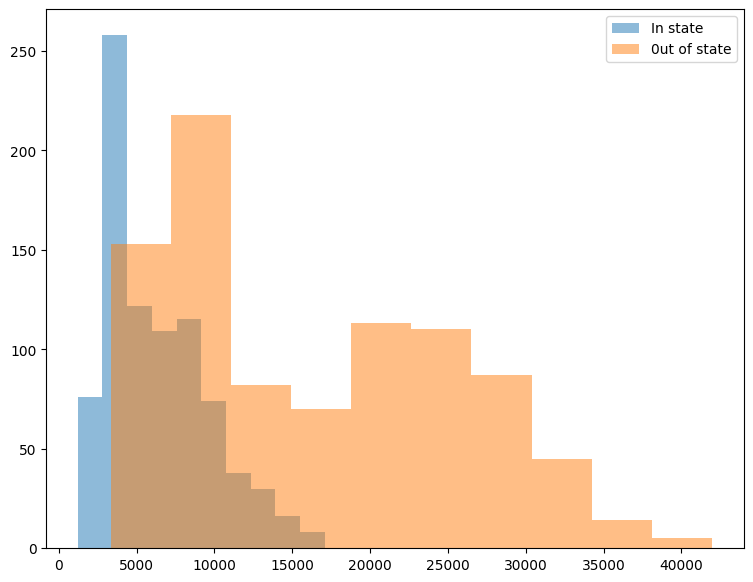

In [43]:
#1 Plot the histogram and check the skewness and kurtosis 
plt.figure(figsize=(9,7))
plt.hist (In_state_data['Value'], alpha = .5, label='In state')
plt.hist(Out_of_state_data['Value'], alpha = .5, label='0ut of state')
plt.legend()
plt.savefig('histogram')
plt.show()

#### The distributions of the datas do not  really look normally distributed. But let's check for skewness and kurtosis

In [10]:
print(stats.describe(In_state_data['Value']))
print(stats.describe(Out_of_state_data['Value']))

DescribeResult(nobs=846, minmax=(1225, 17083), mean=6317.919621749409, variance=10782687.056253584, skewness=0.8170107071864043, kurtosis=0.019046097144705065)
DescribeResult(nobs=897, minmax=(3340, 41963), mean=16327.26867335563, variance=81280018.76590371, skewness=0.4264972130431569, kurtosis=-1.0136903854530785)


#### Both the values for the skewness and the kurtosis are between -3 and 3. Great! It appears that each is normally distributed.

Let's recall the two hypotheses:
    
**H₀:** There is no significant difference between the average cost of undergraduate students in public in-state universities  versus that of public out-of-state.

**Ha:** There is a significant difference between the average cost of undergraduate students in public in-state universities  versus that of public out-of-state.


Having checked for normality, I can perfrom a ttest between the groups at the two-tail

#### Conduct a ttest

In [11]:
print(stats.ttest_ind(In_state_data['Value'], Out_of_state_data['Value']))

Ttest_indResult(statistic=-30.443497252772996, pvalue=1.4407205749674063e-163)


The result of the ttest is quite interesting. The very small pvalue (less than 0.05) and the very large value of the ttest statistic show that the two groups are significant different. If so, on average how much can be that difference and how sure are we about that difference?

In [44]:
### Confidence interval

In [45]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(In_state_data['Value'], Out_of_state_data['Value']))

# what is the current mean price if in-state universities
print(In_state_data['Value'].mean())

The difference in means at the 95% confidence interval (two-tail) is between 9379.219967785079 and 10639.47813542736.
6317.919621749409


Visualizing the difference in means with a point plot

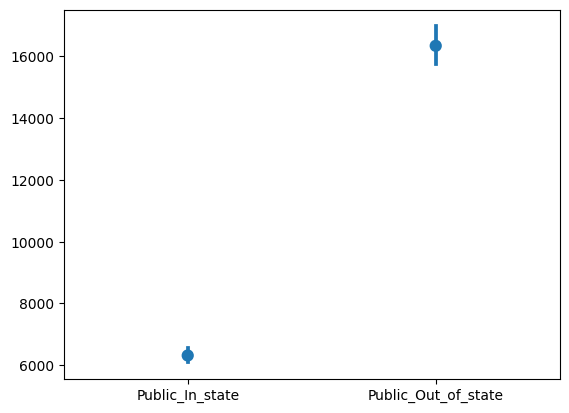

In [46]:
import seaborn as sns

g = sns.pointplot(data=[In_state_data['Value'],
                        Out_of_state_data['Value']], join=False)
                        
g.set(xticklabels = ['Public_In_state', 'Public_Out_of_state'])
plt.savefig('poinplot')
plt.show()

#### What can explain this huge difference, since all universities we are dealing with are public. What makes public out of state universities so expensive compared to public in-state universities? Our intuitive answer might be because public out of state students do not pay taxes and then are charged more than those wo do pay taxes.  We can't truly prove this assumption using the dataset provided, but adding another variable to the data could provide compelling evidence for it.

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 9.1/15.5 MB 770.5 kB/s eta 0:00:09:09
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 437, in _error_catcher
    yield
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/urllib3/response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "/usr/lib/python3.10/http/client.py", line 465, in read
    s = self.fp.read(amt)
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "/us